### Import Pytorch Libraries

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

### Import EVA5-Jedi reporitory
#### https://test.pypi.org/project/tsai-jedi/0.0.1/#files

In [7]:
pip install -i https://test.pypi.org/simple/ eva5-jedi==0.0.1

Looking in indexes: https://test.pypi.org/simple/


#### Import Necessay packages for Model, BatchNormm Train, Test & DataLoader etc

In [8]:
from com.tsai.jedi.batchnorm  import BatchNorm
from com.tsai.jedi.batchnorm  import GhostBatchNorm
from com.tsai.jedi.model import Net
from com.tsai.jedi.model import model_summary
from com.tsai.jedi.Engine_train_test import train
from com.tsai.jedi.Engine_train_test import test
from com.tsai.jedi.dataloader import train_loader, test_loader
from com.tsai.jedi import config

#### Import scheduler

In [9]:
from __future__ import print_function
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import sys


print(model_summary(Net(1), config.input_size))

accu = []
loss_test = []


model_ = Net(BN_flag=1).to(config.device)
optimizer = optim.SGD(model_.parameters(), lr=0.016, momentum=0.9)
scheduler = StepLR(optimizer, step_size=2, gamma=0.92)

valid_acc = []
loss_test_ = []
l1_regularization = [0, 0]
for epoch in range(1, 31):
    train(model_, config.device, train_loader, optimizer, epoch, l1_regularization)
    scheduler.step()
    valid_a, valid_l = test(model_, config.device, test_loader)
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    loss_test_.append(valid_l)

accu.append(valid_acc)
loss_test.append(loss_test_)

import pickle
with open("model_op_params.pickle","wb") as f:
    pickle.dump(accu, f)
    pickle.dump(loss_test, f)

/usr/local/lib/python3.6/dist-packages/com/tsai/jedi/model.py:149: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
  0%|          | 0/196 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
    GhostBatchNorm-2           [-1, 32, 32, 32]              64
            Conv2d-3           [-1, 32, 32, 32]           9,248
    GhostBatchNorm-4           [-1, 32, 32, 32]              64
           Dropout-5           [-1, 32, 32, 32]               0
         MaxPool2d-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 16, 18, 18]             528
    GhostBatchNorm-8           [-1, 16, 18, 18]              32
           Dropout-9           [-1, 16, 18, 18]               0
           Conv2d-10           [-1, 16, 18, 18]             160
           Conv2d-11           [-1, 64, 18, 18]           1,088
depthwise_separable_conv-12           [-1, 64, 18, 18]               0
   GhostBatchNorm-13           [-1, 64, 18, 18]             128
          Dropout-14           [

Epoch: 1,LR: 0.016.
Train set: train Average loss: 1.4768, train_Accuracy: 16381/50000 (32.7620%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.6392, Accuracy: 4132/10000 (41.3200%)



Epoch: 2,LR: 0.016.
Train set: train Average loss: 1.2410, train_Accuracy: 25280/50000 (50.5600%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3805, Accuracy: 4928/10000 (49.2800%)



Epoch: 3,LR: 0.01472.
Train set: train Average loss: 1.1832, train_Accuracy: 28855/50000 (57.7100%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.0768, Accuracy: 6133/10000 (61.3300%)



Epoch: 4,LR: 0.01472.
Train set: train Average loss: 1.0343, train_Accuracy: 30977/50000 (61.9540%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.0791, Accuracy: 6174/10000 (61.7400%)



Epoch: 5,LR: 0.013542400000000001.
Train set: train Average loss: 0.6647, train_Accuracy: 32474/50000 (64.9480%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9432, Accuracy: 6754/10000 (67.5400%)



Epoch: 6,LR: 0.013542400000000001.
Train set: train Average loss: 0.8063, train_Accuracy: 33581/50000 (67.1620%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8585, Accuracy: 7050/10000 (70.5000%)



Epoch: 7,LR: 0.012459008000000002.
Train set: train Average loss: 0.9312, train_Accuracy: 34561/50000 (69.1220%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7734, Accuracy: 7311/10000 (73.1100%)



Epoch: 8,LR: 0.012459008000000002.
Train set: train Average loss: 0.7448, train_Accuracy: 35345/50000 (70.6900%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8649, Accuracy: 7007/10000 (70.0700%)



Epoch: 9,LR: 0.011462287360000002.
Train set: train Average loss: 0.9555, train_Accuracy: 36187/50000 (72.3740%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7802, Accuracy: 7330/10000 (73.3000%)



Epoch: 10,LR: 0.011462287360000002.
Train set: train Average loss: 0.8755, train_Accuracy: 36717/50000 (73.4340%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7541, Accuracy: 7440/10000 (74.4000%)



Epoch: 11,LR: 0.010545304371200001.
Train set: train Average loss: 0.6386, train_Accuracy: 37322/50000 (74.6440%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7406, Accuracy: 7507/10000 (75.0700%)



Epoch: 12,LR: 0.010545304371200001.
Train set: train Average loss: 0.5609, train_Accuracy: 37634/50000 (75.2680%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6807, Accuracy: 7715/10000 (77.1500%)



Epoch: 13,LR: 0.009701680021504002.
Train set: train Average loss: 0.6824, train_Accuracy: 38087/50000 (76.1740%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6781, Accuracy: 7739/10000 (77.3900%)



Epoch: 14,LR: 0.009701680021504002.
Train set: train Average loss: 0.6505, train_Accuracy: 38308/50000 (76.6160%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6528, Accuracy: 7840/10000 (78.4000%)



Epoch: 15,LR: 0.008925545619783683.
Train set: train Average loss: 0.7042, train_Accuracy: 38646/50000 (77.2920%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6416, Accuracy: 7897/10000 (78.9700%)



Epoch: 16,LR: 0.008925545619783683.
Train set: train Average loss: 0.5693, train_Accuracy: 38891/50000 (77.7820%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6545, Accuracy: 7847/10000 (78.4700%)



Epoch: 17,LR: 0.008211501970200989.
Train set: train Average loss: 0.5097, train_Accuracy: 39256/50000 (78.5120%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6701, Accuracy: 7838/10000 (78.3800%)



Epoch: 18,LR: 0.008211501970200989.
Train set: train Average loss: 0.5020, train_Accuracy: 39299/50000 (78.5980%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6026, Accuracy: 8074/10000 (80.7400%)



Epoch: 19,LR: 0.007554581812584909.
Train set: train Average loss: 0.6203, train_Accuracy: 39484/50000 (78.9680%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6049, Accuracy: 8017/10000 (80.1700%)



Epoch: 20,LR: 0.007554581812584909.
Train set: train Average loss: 0.6132, train_Accuracy: 39932/50000 (79.8640%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6003, Accuracy: 8014/10000 (80.1400%)



Epoch: 21,LR: 0.006950215267578117.
Train set: train Average loss: 0.5388, train_Accuracy: 40124/50000 (80.2480%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5830, Accuracy: 8102/10000 (81.0200%)



Epoch: 22,LR: 0.006950215267578117.
Train set: train Average loss: 0.8209, train_Accuracy: 40212/50000 (80.4240%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6340, Accuracy: 7982/10000 (79.8200%)



Epoch: 23,LR: 0.006394198046171868.
Train set: train Average loss: 0.7129, train_Accuracy: 40434/50000 (80.8680%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5795, Accuracy: 8157/10000 (81.5700%)



Epoch: 24,LR: 0.006394198046171868.
Train set: train Average loss: 0.5801, train_Accuracy: 40466/50000 (80.9320%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5614, Accuracy: 8179/10000 (81.7900%)



Epoch: 25,LR: 0.005882662202478119.
Train set: train Average loss: 0.5203, train_Accuracy: 40750/50000 (81.5000%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5627, Accuracy: 8196/10000 (81.9600%)



Epoch: 26,LR: 0.005882662202478119.
Train set: train Average loss: 0.5939, train_Accuracy: 40952/50000 (81.9040%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5995, Accuracy: 8096/10000 (80.9600%)



Epoch: 27,LR: 0.005412049226279869.
Train set: train Average loss: 0.4978, train_Accuracy: 40930/50000 (81.8600%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5742, Accuracy: 8235/10000 (82.3500%)



Epoch: 28,LR: 0.005412049226279869.
Train set: train Average loss: 0.4701, train_Accuracy: 41006/50000 (82.0120%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5745, Accuracy: 8164/10000 (81.6400%)



Epoch: 29,LR: 0.00497908528817748.
Train set: train Average loss: 0.3059, train_Accuracy: 41266/50000 (82.5320%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5604, Accuracy: 8225/10000 (82.2500%)



Epoch: 30,LR: 0.00497908528817748.
Train set: train Average loss: 0.4463, train_Accuracy: 41338/50000 (82.6760%)




Test set: Average loss: 0.5979, Accuracy: 8123/10000 (81.2300%)



### Validation Loss Plot

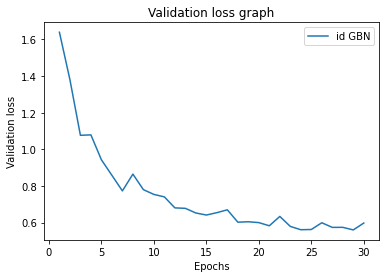

In [10]:
import matplotlib.pyplot as plt

x = [i for i in range(1,31)]
y = loss_test
Modelgraph = ['GBN']

plt.title("Validation loss graph")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
#plt.figure(figsize=(10,10))

for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
#plt.show()
plt.savefig('Validation loss graph')

### Validation Accuracy Plot

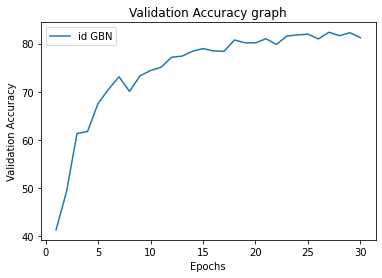

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

x = [i for i in range(1,31)]
y = accu
Modelgraph = ['GBN']


plt.title("Validation Accuracy graph")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")


for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
plt.show()
plt.savefig('Validation Accuracy graph_')